In [2]:
pip install ijson

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [33]:
import json
import ijson
import matplotlib.pyplot as plt
#from langchain_community.chat_models import ChatOllama
from tqdm import tqdm
import numpy as np
from pathlib import Path
import pandas as pd

# getting ir scores from 100 to 1000

In [179]:
def get_ir_scores(path = 'ir_scores/scores_bm25.json'):
    ir_scores = []
    with open(path, 'rb') as file:
        for all_scores in ijson.items(file, "all_scores"):
            for scores in all_scores :
                ir_scores.append([s[0] for s in scores[:10]])
    return ir_scores

def get_level_scores(scores):
    levels = [[] for _ in range(10)]
    for sublist in scores:
        for i, score in enumerate(sublist):
            levels[i].append(score)
    return levels

def average(ir_scores):
    return round(sum(ir_scores)/len(ir_scores), 2)
   
def get_average_level (levels):
    avgs = []
    for level in levels:
        avgs.append(average(level))
    return avgs

def get_percentage_k(ir_scores, k = 0.60):
    count = 0
    for score in ir_scores:
        if score >= k:
            count +=1
    return round(count/len(ir_scores), 2)

def get_percentage_k_levels (levels, k = 0.60):
    perc_k_levels = []
    for level in levels:
        perc_k_levels.append(get_percentage_k(level, k = k))
    return perc_k_levels

In [393]:
ir_scores_bm25 = get_ir_scores(path = 'ir_scores/scores_bm25.json')
ir_scores_sim = get_ir_scores(path = 'ir_scores/scores_sim.json')
ir_scores_mmr = get_ir_scores(path = 'ir_scores/scores_mmr.json')
ir_scores_mlq = get_ir_scores(path = 'ir_scores/scores_mlq.json')
ir_scores_reo = get_ir_scores(path = 'ir_scores/scores_reo.json')

In [ ]:
all_scores = [[]]

In [21]:
levels_bm25 = get_level_scores(ir_scores_bm25)
levels_sim = get_level_scores(ir_scores_sim)
levels_mmr = get_level_scores(ir_scores_mmr)
levels_mlq = get_level_scores(ir_scores_mlq)
levels_reo = get_level_scores(ir_scores_reo)

In [22]:
avg_bm25 = get_average_level(levels_bm25)
avg_sim = get_average_level(levels_sim)
avg_mmr = get_average_level(levels_mmr)
avg_mlq = get_average_level(levels_mlq)
avg_reo = get_average_level(levels_reo)

In [23]:
all_avgs = [avg_bm25, avg_sim, avg_mmr, avg_mlq, avg_reo]

In [26]:
df = pd.DataFrame(all_avgs).T
df.columns = ['avg_bm25', 'avg_sim', 'avg_mmr', 'avg_mlq', 'avg_reo']
new_index = list(range(100, 1100, 100))
df.index = new_index
df

,avg_bm25,avg_sim,avg_mmr,avg_mlq,avg_reo
100,0.40,0.34,0.34,0.29,0.16
200,0.46,0.39,0.38,0.33,0.19
300,0.49,0.41,0.39,0.35,0.20
400,0.52,0.44,0.41,0.37,0.21
500,0.55,0.46,0.42,0.39,0.22
600,0.57,0.47,0.43,0.40,0.23
700,0.58,0.48,0.44,0.41,0.24
800,0.60,0.50,0.44,0.42,0.25
900,0.61,0.51,0.45,0.43,0.26
1000,0.62,0.52,0.46,0.43,0.26


In [29]:
latex_code = df.to_latex(index=True)
print(latex_code)

\begin{tabular}{llllll}
\toprule
 & avg_bm25 & avg_sim & avg_mmr & avg_mlq & avg_reo \\
\midrule
100 & 0.40 & 0.34 & 0.34 & 0.29 & 0.16 \\
200 & 0.46 & 0.39 & 0.38 & 0.33 & 0.19 \\
300 & 0.49 & 0.41 & 0.39 & 0.35 & 0.20 \\
400 & 0.52 & 0.44 & 0.41 & 0.37 & 0.21 \\
500 & 0.55 & 0.46 & 0.42 & 0.39 & 0.22 \\
600 & 0.57 & 0.47 & 0.43 & 0.40 & 0.23 \\
700 & 0.58 & 0.48 & 0.44 & 0.41 & 0.24 \\
800 & 0.60 & 0.50 & 0.44 & 0.42 & 0.25 \\
900 & 0.61 & 0.51 & 0.45 & 0.43 & 0.26 \\
1000 & 0.62 & 0.52 & 0.46 & 0.43 & 0.26 \\
\bottomrule
\end{tabular}



In [33]:
percs_bm25 = get_percentage_k_levels(levels_bm25)
percs_sim = get_percentage_k_levels(levels_sim)
percs_mmr = get_percentage_k_levels(levels_mmr)
percs_mlq = get_percentage_k_levels(levels_mlq)
percs_reo = get_percentage_k_levels(levels_reo)

In [34]:
all_percs = [percs_bm25, percs_sim, percs_mmr, percs_mlq, percs_reo]

In [36]:
df = pd.DataFrame(all_percs).T
df.columns = ['bm25', 'sim', 'mmr', 'mlq', 'reo']
new_index = list(range(100, 1100, 100))
df.index = new_index
df

,bm25,sim,mmr,mlq,reo
100,0.15,0.11,0.11,0.08,0.04
200,0.21,0.16,0.14,0.11,0.05
300,0.26,0.18,0.16,0.13,0.06
400,0.30,0.21,0.17,0.14,0.06
500,0.34,0.23,0.19,0.15,0.07
600,0.37,0.25,0.20,0.16,0.07
700,0.39,0.27,0.21,0.17,0.08
800,0.41,0.29,0.22,0.18,0.09
900,0.43,0.30,0.23,0.19,0.09
1000,0.45,0.31,0.24,0.19,0.09


In [39]:
latex_code = df.to_latex(index=True)
print(latex_code)

\begin{tabular}{lrrrrr}
\toprule
 & bm25 & sim & mmr & mlq & reo \\
\midrule
100 & 0.150000 & 0.110000 & 0.110000 & 0.080000 & 0.040000 \\
200 & 0.210000 & 0.160000 & 0.140000 & 0.110000 & 0.050000 \\
300 & 0.260000 & 0.180000 & 0.160000 & 0.130000 & 0.060000 \\
400 & 0.300000 & 0.210000 & 0.170000 & 0.140000 & 0.060000 \\
500 & 0.340000 & 0.230000 & 0.190000 & 0.150000 & 0.070000 \\
600 & 0.370000 & 0.250000 & 0.200000 & 0.160000 & 0.070000 \\
700 & 0.390000 & 0.270000 & 0.210000 & 0.170000 & 0.080000 \\
800 & 0.410000 & 0.290000 & 0.220000 & 0.180000 & 0.090000 \\
900 & 0.430000 & 0.300000 & 0.230000 & 0.190000 & 0.090000 \\
1000 & 0.450000 & 0.310000 & 0.240000 & 0.190000 & 0.090000 \\
\bottomrule
\end{tabular}



# getting LLM scores

In [1]:
def read_file_to_list_of_lists(file_path):
    list_of_lists = []
    with open(file_path, 'r') as file:
        for line in file:
            # Split each line by comma and convert the elements to integers
            list_of_lists.append([int(item) for item in line.strip().split(',')])
    return list_of_lists

def get_unique_col_counts(data):
    numpy_array = np.array(data)
    column_unique_counts = []
    for col_index in range(numpy_array.shape[1]):
        col = numpy_array[:, col_index]
        unique_elements, counts = np.unique(col, return_counts=True)
        total_sum = np.sum(counts)
        percentages =  np.round((counts / total_sum), 2)

        unique_counts_dict = dict(zip(unique_elements, percentages))
        column_unique_counts.append(unique_counts_dict)
    return column_unique_counts

data1 = read_file_to_list_of_lists('scores.txt' )
data2 = read_file_to_list_of_lists('scores_2.txt' )
llm_scores = data1 + data2[4:]

In [5]:
import json

In [6]:
with open('llm_scores.json', 'w') as json_file:
    json.dump(llm_scores, json_file, indent=4)

In [384]:
# bm25
i_scores_5 = []
for i, scores in enumerate(llm_scores):
    if scores[1] == 1:
        i_scores_5.append(i)

In [385]:
scores_5 = [ir_scores_bm25[i][-1] for i in i_scores_5]

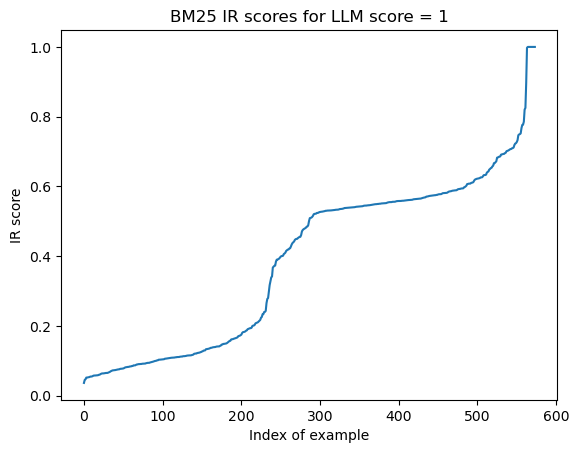

In [386]:
import matplotlib.pyplot as plt

plt.plot(sorted(scores_5))

plt.xlabel('Index of example')
plt.ylabel('IR score')
plt.title('BM25 IR scores for LLM score = 1')

plt.show()

In [300]:
import matplotlib.pyplot as plt


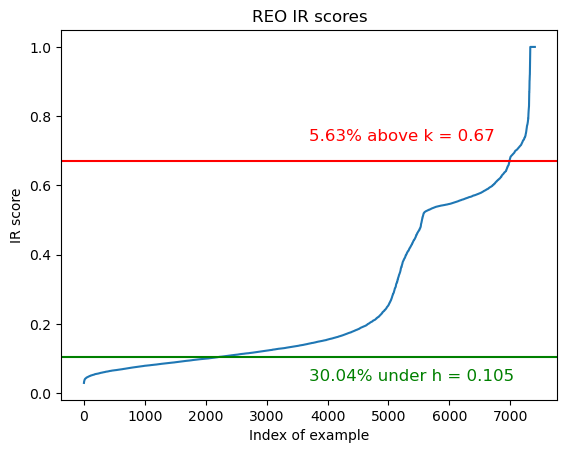

In [394]:
ir_scores = [ir_score[-1] for ir_score in ir_scores_reo]
sorted_scores = sorted(ir_scores)
threshold = 0.67
above_threshold = [score for score in ir_scores if score > threshold]
percentage_above_threshold = (len(above_threshold) / len(ir_scores)) * 100

min_threshold = 0.105
under_threshold = [score for score in ir_scores if score < min_threshold]
percentage_under_threshold = (len(under_threshold) / len(ir_scores)) * 100

plt.plot(sorted_scores)
plt.axhline(y=threshold, color='red', linestyle='-') 
plt.axhline(y=min_threshold, color='green', linestyle='-')  

# Display the percentage on the plot
plt.text(0.5, 0.7, f'{percentage_above_threshold:.2f}% above k = {threshold}', color='red', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.5, 0.05, f'{percentage_under_threshold:.2f}% under h = {min_threshold}', color='green', fontsize=12, transform=plt.gca().transAxes)
plt.xlabel('Index of example')
plt.ylabel('IR score')
plt.title('REO IR scores')

plt.show()

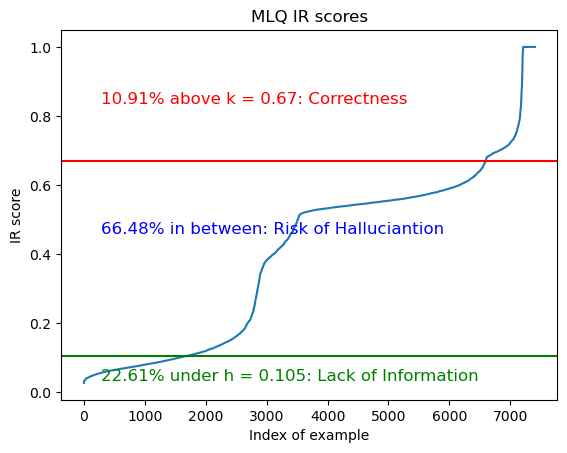

In [406]:
import matplotlib.pyplot as plt

ir_scores = [ir_score[-1] for ir_score in ir_scores_mlq]
sorted_scores = sorted(ir_scores)
# Define thresholds
threshold = 0.67
min_threshold = 0.105

# Calculate percentages
above_threshold = [score for score in ir_scores if score > threshold]
percentage_above_threshold = (len(above_threshold) / len(ir_scores)) * 100

under_threshold = [score for score in ir_scores if score < min_threshold]
percentage_under_threshold = (len(under_threshold) / len(ir_scores)) * 100

# Calculate the percentage between min_threshold and threshold
between_thresholds = [score for score in ir_scores if min_threshold <= score <= threshold]
percentage_between_thresholds = (len(between_thresholds) / len(ir_scores)) * 100

# Plotting
plt.plot(sorted_scores)
plt.axhline(y=threshold, color='red', linestyle='-') 
plt.axhline(y=min_threshold, color='green', linestyle='-')  

# Display the percentage on the plot
plt.text(0.08, 0.8, f'{percentage_above_threshold:.2f}% above k = {threshold}: Correctness', color='red', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.08, 0.05, f'{percentage_under_threshold:.2f}% under h = {min_threshold}: Lack of Information', color='green', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.08, 0.45, f'{percentage_between_thresholds:.2f}% in between: Risk of Halluciantion', color='blue', fontsize=12, transform=plt.gca().transAxes)

plt.xlabel('Index of example')
plt.ylabel('IR score')
plt.title('MLQ IR scores')

plt.show()


In [103]:
llm_scores_bm25 = [scores[1] for scores in llm_scores]

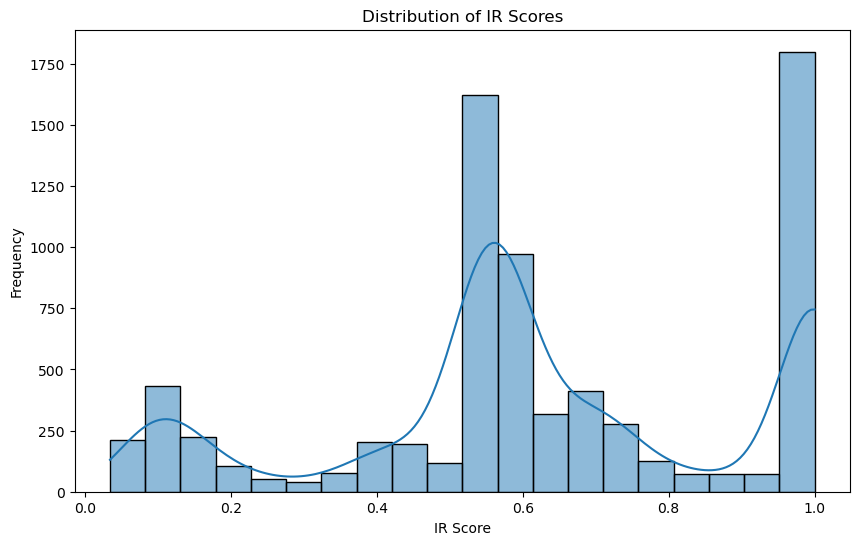

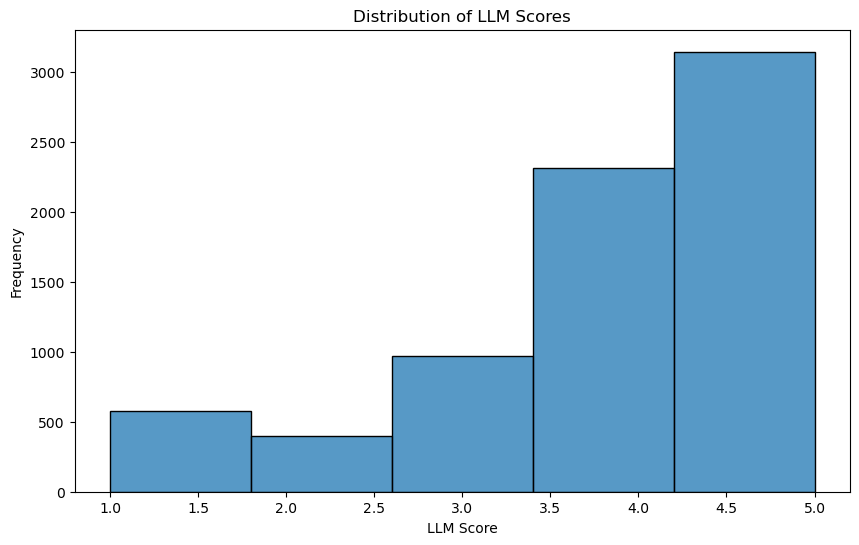

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    'IR Score': ir_scores,
    'LLM Score': llm_scores_bm25
})

# Distribution of IR Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['IR Score'], bins=20, kde=True)
plt.title('Distribution of IR Scores')
plt.xlabel('IR Score')
plt.ylabel('Frequency')
plt.show()

# Distribution of LLM Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['LLM Score'], bins=5, kde=False)
plt.title('Distribution of LLM Scores')
plt.xlabel('LLM Score')
plt.ylabel('Frequency')
plt.show()


In [105]:
correlation = df['IR Score'].corr(df['LLM Score'])
print(f"Correlation between IR Score and LLM Score: {correlation}")

Correlation between IR Score and LLM Score: 0.31698979231758645


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Optimal threshold (k): inf


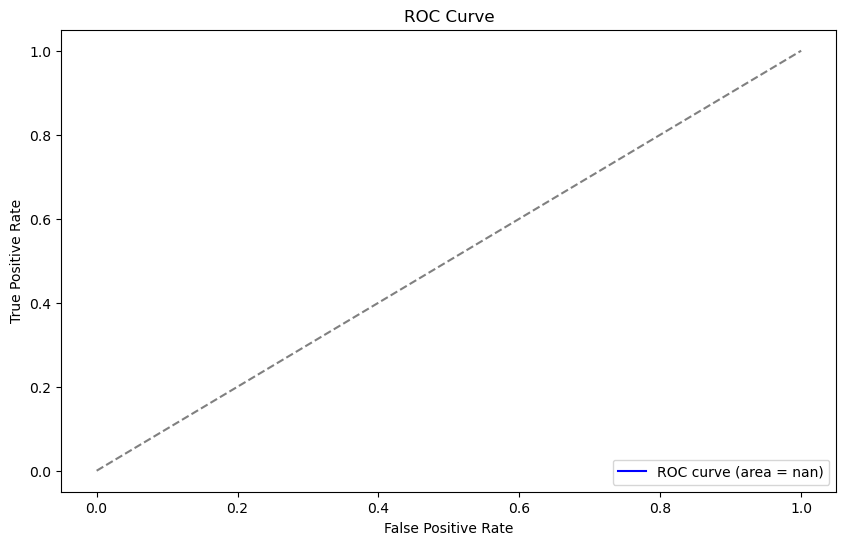

In [239]:
from sklearn.metrics import roc_curve, auc

# Binarize LLM Scores (1 if score is 5, 0 otherwise)
df['Correct'] = (df['LLM Score'] == 5).astype(int)

fpr, tpr, thresholds = roc_curve(df['Correct'], df['IR Score'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


# Determine the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal threshold (k = {optimal_threshold:.2f})')
print(f"Optimal threshold (k): {optimal_threshold}")
plt.show()

In [116]:
len(df['IR Score'])

7404

In [122]:
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt


# Convert LLM Score to binary (1 if score is 5, 0 otherwise)
df['Correct'] = (df['LLM Score'] == 5).astype(int)

# Likelihood function
def likelihood_function(k, scores, outcomes):
    k = k[0]
    p = (scores > k).astype(int)  # Probability of being classified as 1
    likelihoods = p * outcomes + (1 - p) * (1 - outcomes)
    return -np.sum(np.log(likelihoods + 1e-10))  # Add a small value to avoid log(0)

# Define the bounds for k
bounds = [(0, 1)]  # Assuming IR scores are between 0 and 1

# Perform the optimization
result = differential_evolution(likelihood_function, bounds, args=(df['IR Score'], df['Correct']))

# Optimal threshold
optimal_k = result.x[0]
print(f"Optimal threshold (k): {optimal_k}")



Optimal threshold (k): 0.708255386121654


In [147]:
df['Correct'] = (df['LLM Score'] == 5).astype(int)

In [149]:
df['Filtered'] = ((df['LLM Score'] == 2) | (df['LLM Score'] == 4)).astype(int)

In [150]:
len(df['Filtered'])

7404

In [153]:
filtered_df['IR Score']

0       0.5555555555555556
1       0.3828516120419197
2       0.4674399301004806
5       0.2200404858299595
8       0.6916299559471365
               ...        
7390    0.5728155339805825
7391    0.5878136200716846
7393    0.6509433962264151
7400                   1.0
7402    0.6214285714285714
Name: IR Score, Length: 2716, dtype: object

In [177]:
ir_scores_bm25_1000 = [float(ir_score[-1]) for ir_score in ir_scores_bm25]

In [170]:
ir_scores_bm25_1000[0]

Decimal('0.5555555555555556')

In [178]:
import numpy as np
from scipy.optimize import differential_evolution

# Example lists of IR scores and LLM scores
IR_scores = np.array(ir_scores_bm25_1000)
LLM_scores = np.array(llm_scores_bm25)

# Define the objective function
def objective_function(params):
    a, b = params
    total_penalty = 0
    for ir, llm in zip(IR_scores, LLM_scores):
        if llm in [2, 4]:
            total_penalty += max(0, ir - b) + max(0, a - ir)
    return total_penalty

# Define the bounds for a and b
bounds = [(min(IR_scores), max(IR_scores)), (min(IR_scores), max(IR_scores))]

# Run differential evolution to minimize the objective function
result = differential_evolution(objective_function, bounds)
a_opt, b_opt = result.x

# Print the results
print(f"Optimal a: {a_opt}")
print(f"Optimal b: {b_opt}")

Optimal a: 0.03427897583257655
Optimal b: 1.0


In [97]:
unique_scores = get_unique_col_counts(llm_scores)
unique_scores[-1], unique_scores[-2] = unique_scores[-2], unique_scores[-1]
unique_scores

[{1: 0.01, 2: 0.13, 3: 0.04, 4: 0.58, 5: 0.24},
 {1: 0.08, 2: 0.05, 3: 0.13, 4: 0.31, 5: 0.42},
 {1: 0.09, 2: 0.05, 3: 0.14, 4: 0.4, 5: 0.32},
 {1: 0.1, 2: 0.07, 3: 0.12, 4: 0.42, 5: 0.29},
 {1: 0.18, 2: 0.06, 3: 0.12, 4: 0.41, 5: 0.24},
 {1: 0.21, 2: 0.05, 3: 0.07, 4: 0.49, 5: 0.18}]

In [99]:
df = pd.DataFrame(unique_scores)
df.index = ['llm only', 'bm25', 'sim', 'mmr', 'mlq', 'reo']
df

,1,2,3,4,5
llm only,0.01,0.13,0.04,0.58,0.24
bm25,0.08,0.05,0.13,0.31,0.42
sim,0.09,0.05,0.14,0.40,0.32
mmr,0.10,0.07,0.12,0.42,0.29
mlq,0.18,0.06,0.12,0.41,0.24
reo,0.21,0.05,0.07,0.49,0.18


In [102]:
latex_code = df.to_latex(index=True)
print(latex_code)

\begin{tabular}{lrrrrr}
\toprule
 & 1 & 2 & 3 & 4 & 5 \\
\midrule
llm only & 0.010000 & 0.130000 & 0.040000 & 0.580000 & 0.240000 \\
bm25 & 0.080000 & 0.050000 & 0.130000 & 0.310000 & 0.420000 \\
sim & 0.090000 & 0.050000 & 0.140000 & 0.400000 & 0.320000 \\
mmr & 0.100000 & 0.070000 & 0.120000 & 0.420000 & 0.290000 \\
mlq & 0.180000 & 0.060000 & 0.120000 & 0.410000 & 0.240000 \\
reo & 0.210000 & 0.050000 & 0.070000 & 0.490000 & 0.180000 \\
\bottomrule
\end{tabular}



In [2]:
with open("sample_100.json", 'r') as file:
    sample_data = json.load(file)

In [68]:
def get_ir_scores_sample(sample, path = 'ir_scores/scores_bm25.json'):
    scores_k = []
    with open(path, 'rb') as file:
        for all_scores in ijson.items(file, "all_scores"):
            for index,_ in sample:
                scores_k.append([s[0] for s in all_scores[index][:10]])
    return scores_k

def get_ir_scores_1000(path = 'ir_scores/scores_bm25.json'):
    scores_1000 = []
    with open(path, 'rb') as file:
        for all_scores in ijson.items(file, "all_scores"):
            for scores in all_scores :
                scores_1000.append(scores[:10][-1][0])
    return scores_1000

def get_ir_scores(path = 'ir_scores/scores_bm25.json'):
    ir_scores = []
    with open(path, 'rb') as file:
        for all_scores in ijson.items(file, "all_scores"):
            for scores in all_scores :
                ir_scores.append([s[0] for s in scores[:10]])
    return ir_scores

with open("all_scores_sample3.json", 'r') as file:
    sample_llm_scores = json.load(file)

In [4]:
ir_scores_k = get_ir_scores_sample(sample_data)

In [33]:
ir_scores_bm25 = get_ir_scores(path = 'ir_scores/scores_bm25.json')
ir_scores_sim = get_ir_scores(path = 'ir_scores/scores_sim.json')
ir_scores_mmr = get_ir_scores(path = 'ir_scores/scores_mmr.json')
ir_scores_mlq = get_ir_scores(path = 'ir_scores/scores_mlq.json')
ir_scores_reo = get_ir_scores(path = 'ir_scores/scores_reo.json')

In [72]:
def get_level_scores(scores):
    levels = [[] for _ in range(10)]
    for sublist in scores:
        for i, score in enumerate(sublist):
            levels[i].append(score)
    return levels

def get_average_level (levels):
    avgs = []
    for level in levels:
        avgs.append(average(level))
    return avgs
def get_percentage_k_levels (levels,k):
    p = []
    for level in levels:
        p.append(get_percentage_k(level, k = k))

    return p

In [73]:
levels_bm25 = get_level_scores(ir_scores_bm25)
levels_sim = get_level_scores(ir_scores_sim)
levels_mmr = get_level_scores(ir_scores_mmr)
levels_mlq = get_level_scores(ir_scores_mlq)
levels_reo = get_level_scores(ir_scores_reo)

In [74]:
avg_bm25 = get_average_level(levels_bm25)
avg_sim = get_average_level(levels_sim)
avg_mmr = get_average_level(levels_mmr)
avg_mlq = get_average_level(levels_mlq)
avg_reo = get_average_level(levels_reo)

percent_bm25 = get_percentage_k_levels(levels_bm25, k=0.7)
percent_sim = get_percentage_k_levels(levels_sim, k=0.7)
percent_mmr = get_percentage_k_levels(levels_mmr, k=0.7)
percent_mlq = get_percentage_k_levels(levels_mlq, k=0.7)
percent_reo = get_percentage_k_levels(levels_reo, k=0.7)

# Printing results
print("Average Levels:")
print("BM25:", avg_bm25)
print("SIM:", avg_sim)
print("MMR:", avg_mmr)
print("MLQ:", avg_mlq)
print("REO:", avg_reo)

print("\nPercentage of Scores >= 0.5:")
print("BM25:", percent_bm25)
print("SIM:", percent_sim)
print("MMR:", percent_mmr)
print("MLQ:", percent_mlq)
print("REO:", percent_reo)

Average Levels:
BM25: [Decimal('0.4035648137288971297521609941'), Decimal('0.4575142380880016957531064290'), Decimal('0.4871870481279991637098865478'), Decimal('0.5196673833615388074808211777'), Decimal('0.5454254522123379686162884927'), Decimal('0.5662992254723105904569652750'), Decimal('0.5842908117330048215225981055'), Decimal('0.5991039503369806050116641801'), Decimal('0.6126169319011212074063989108'), Decimal('0.6249797667789845563022936410')]
SIM: [Decimal('0.3372771024144097228260399784'), Decimal('0.3900714774733331451547811994'), Decimal('0.4147772614472508513548082118'), Decimal('0.4361106511089088883832230177'), Decimal('0.4551472178328748735850790647'), Decimal('0.4708106812450693499076278063'), Decimal('0.4848144569798483081681596091'), Decimal('0.4977135511223753912888707038'), Decimal('0.5085539643656905141522187114'), Decimal('0.5191601276974470019000415340')]
MMR: [Decimal('0.3358503115791513958421123717'), Decimal('0.3786762710678519575601026472'), Decimal('0.39401860

In [69]:
ir_scores_1000_bm25 = get_ir_scores_1000(path = 'ir_scores/scores_bm25.json')
ir_scores_1000_sim = get_ir_scores_1000(path = 'ir_scores/scores_sim.json')
ir_scores_1000_mmr = get_ir_scores_1000(path = 'ir_scores/scores_mmr.json')
ir_scores_1000_mlq = get_ir_scores_1000(path = 'ir_scores/scores_mlq.json')
ir_scores_1000_reo = get_ir_scores_1000(path = 'ir_scores/scores_reo.json')

In [70]:
len(ir_scores_1000_bm25)

7404

In [142]:
def average(ir_scores):
    return sum(ir_scores)/len(ir_scores)

def get_percentage_k(ir_scores, k = 0.60):
    count = 0
    for score in ir_scores:
        if score >= k:
            count +=1
    return count/len(ir_scores)

def get_percentage_borns(ir_scores, j = 0.26,h= 0.58):
    count = 0
    for score in ir_scores:
        if score <= h and score >= j:
            count +=1
    return count/len(ir_scores)

In [132]:
percentage_k_bm25 = get_percentage_k(ir_scores_1000_bm25)
percentage_k_sim = get_percentage_k(ir_scores_1000_sim)
percentage_k_mmr = get_percentage_k(ir_scores_1000_mmr)
percentage_k_mlq = get_percentage_k(ir_scores_1000_mlq)
percentage_k_reo = get_percentage_k(ir_scores_1000_reo)

print("Percentage K for BM25:", percentage_k_bm25)
print("Percentage K for SIM:", percentage_k_sim)
print("Percentage K for MMR:", percentage_k_mmr)
print("Percentage K for MLQ:", percentage_k_mlq)
print("Percentage K for REO:", percentage_k_reo)

Percentage K for BM25: 0.5510534846029174
Percentage K for SIM: 0.6939492166396543
Percentage K for MMR: 0.7662074554294975
Percentage K for MLQ: 0.8313074014046461
Percentage K for REO: 0.9057266342517558


In [143]:
percentage_borns_bm25 = get_percentage_borns(ir_scores_1000_bm25)
percentage_borns_sim = get_percentage_borns(ir_scores_1000_sim)
percentage_borns_mmr = get_percentage_borns(ir_scores_1000_mmr)
percentage_borns_mlq = get_percentage_borns(ir_scores_1000_mlq)
percentage_borns_reo = get_percentage_borns(ir_scores_1000_reo)

print("Percentage borns for BM25:", percentage_borns_bm25)
print("Percentage borns for SIM:", percentage_borns_sim)
print("Percentage borns for MMR:", percentage_borns_mmr)
print("Percentage borns for MLQ:", percentage_borns_mlq)
print("Percentage borns for REO:", percentage_borns_reo)

Percentage borns for BM25: 0.36223662884927066
Percentage borns for SIM: 0.3927606699081578
Percentage borns for MMR: 0.40153970826580226
Percentage borns for MLQ: 0.4042409508373852
Percentage borns for REO: 0.20448406266882765


In [125]:
new_dicts

[{1: 0.009049162614802809,
  2: 0.1307401404646137,
  3: 0.04321988114532685,
  4: 0.5773905996758509,
  5: 0.23960021609940574},
 {1: 0.07752566180443003,
  2: 0.05415991356023771,
  3: 0.1312803889789303,
  4: 0.31266882766072396,
  5: 0.424365207995678},
 {1: 0.08752025931928688,
  2: 0.053079416531604535,
  3: 0.13749324689357104,
  4: 0.40464613722312265,
  5: 0.3172609400324149},
 {1: 0.10399783900594273,
  2: 0.06537007023230686,
  3: 0.12088060507833603,
  4: 0.4204484062668828,
  5: 0.2893030794165316},
 {1: 0.21326310102647217,
  2: 0.051998919502971364,
  3: 0.06793625067531064,
  4: 0.4901404646137223,
  5: 0.1766612641815235},
 {1: 0.1809832522960562,
  2: 0.059967585089141004,
  3: 0.11534305780659103,
  4: 0.4065370070232307,
  5: 0.2371690977849811}]

In [75]:
len(ir_scores_1000_bm25)

7404

In [81]:
import scipy.optimize as opt

a_bm25 = 0.42436
a_sim = 0.3172
a_mmr = 0.2893
a_mlq = 0.2371
a_reo = 0.1766

def objective(k):
    s = get_percentage_k(ir_scores_1000_reo, k)
    #s = get_percentage_k(ir_scores_1000_bm25, k)
    return abs(s - a_reo)

# Bounds for k between 0 and 1
bounds = [(0, 1)]

# Perform the optimization using differential evolution for better exploration
result = opt.differential_evolution(objective, bounds)

# Optimal value of k
optimal_k= result.x

print("Optimal value of k:", optimal_k)


Optimal value of k: [0.54815489]


In [82]:
0.61722211
0.59469564
0.58092997
0.57267255
0.5481

0.57267255

In [11]:
avg_bm25 = average(ir_scores_1000_bm25)
avg_sim = average(ir_scores_1000_sim)
avg_mmr = average(ir_scores_1000_mmr)
avg_mlq = average(ir_scores_1000_mlq)
avg_reo = average(ir_scores_1000_reo)
print(f"Average BM25: {avg_bm25}")
print(f"Average SIM: {avg_sim}")
print(f"Average MMR: {avg_mmr}")
print(f"Average MLQ: {avg_mlq}")
print(f"Average REO: {avg_reo}")

Average BM25: 0.6240610453344557627098865478
Average SIM: 0.5128080240201006440675310643
Average MMR: 0.4562704477558768106851701783
Average MLQ: 0.3990494596390025177920043220
Average REO: 0.2628835100278659124401674770


In [14]:
def read_file_to_list_of_lists(file_path):
    list_of_lists = []
    with open(file_path, 'r') as file:
        for line in file:
            # Split each line by comma and convert the elements to integers
            list_of_lists.append([int(item) for item in line.strip().split(',')])
    return list_of_lists

data1 = read_file_to_list_of_lists('scores.txt' )
data2 = read_file_to_list_of_lists('scores_2.txt' )
llm_scores = data1 + data2[4:]

In [15]:
def get_unique_col_counts(data):
    numpy_array = np.array(data)
    column_unique_counts = []
    for col_index in range(numpy_array.shape[1]):
        col = numpy_array[:, col_index]
        unique_elements, counts = np.unique(col, return_counts=True)
        unique_counts_dict = dict(zip(unique_elements, counts))
        column_unique_counts.append(unique_counts_dict)
    return column_unique_counts

In [16]:
get_unique_col_counts(sample_llm_scores)

[{2: 19, 3: 3, 4: 37, 5: 41},
 {1: 15, 2: 1, 3: 24, 4: 32, 5: 28},
 {1: 12, 2: 1, 3: 21, 4: 31, 5: 35},
 {1: 11, 3: 18, 4: 31, 5: 40},
 {1: 8, 2: 4, 3: 17, 4: 29, 5: 42},
 {1: 12, 2: 4, 3: 13, 4: 32, 5: 39},
 {1: 11, 2: 2, 3: 12, 4: 28, 5: 47},
 {1: 9, 2: 5, 3: 10, 4: 25, 5: 51},
 {1: 10, 2: 2, 3: 11, 4: 28, 5: 49},
 {1: 4, 2: 5, 3: 12, 4: 29, 5: 50},
 {1: 8, 2: 1, 3: 9, 4: 25, 5: 57}]

In [17]:
get_unique_col_counts(llm_scores)

[{1: 67, 2: 968, 3: 320, 4: 4275, 5: 1774},
 {1: 574, 2: 401, 3: 972, 4: 2315, 5: 3142},
 {1: 648, 2: 393, 3: 1018, 4: 2996, 5: 2349},
 {1: 770, 2: 484, 3: 895, 4: 3113, 5: 2142},
 {1: 1579, 2: 385, 3: 503, 4: 3629, 5: 1308},
 {1: 1340, 2: 444, 3: 854, 4: 3010, 5: 1756}]

In [22]:
llm_scores_dicts = get_unique_col_counts(llm_scores)
new_dicts = []
for entry in llm_scores_dicts:
    total_counts = 0
    dict1 = {}
    for key, value in entry.items():
        total_counts += value
    for key, value in entry.items():
        dict1[key] = value/total_counts
    new_dicts.append(dict1)

In [23]:
new_dicts

[{1: 0.009049162614802809,
  2: 0.1307401404646137,
  3: 0.04321988114532685,
  4: 0.5773905996758509,
  5: 0.23960021609940574},
 {1: 0.07752566180443003,
  2: 0.05415991356023771,
  3: 0.1312803889789303,
  4: 0.31266882766072396,
  5: 0.424365207995678},
 {1: 0.08752025931928688,
  2: 0.053079416531604535,
  3: 0.13749324689357104,
  4: 0.40464613722312265,
  5: 0.3172609400324149},
 {1: 0.10399783900594273,
  2: 0.06537007023230686,
  3: 0.12088060507833603,
  4: 0.4204484062668828,
  5: 0.2893030794165316},
 {1: 0.21326310102647217,
  2: 0.051998919502971364,
  3: 0.06793625067531064,
  4: 0.4901404646137223,
  5: 0.1766612641815235},
 {1: 0.1809832522960562,
  2: 0.059967585089141004,
  3: 0.11534305780659103,
  4: 0.4065370070232307,
  5: 0.2371690977849811}]

## exec time 0, 1000 tokens in context

In [ ]:
pip install pip install langchain-community langchain-core

In [3]:
with open("sample_100.json", 'r') as file:
    sample = json.load(file)

In [4]:
from langchain_community.chat_models import ChatOllama
import timeit
import time

def get_Ck(index, path = 'ir_scores/scores_bm25.json'):
    with open(path, 'rb') as file:
        for all_Ck in ijson.items(file, "all_Ck"):
            break

    return all_Ck[index][:10]

def generate_answer(query , documents=0, llm = ChatOllama(model='llama3', temperature=0.0)):
    if documents :
        prompt = f"""Given the documents below, your role is to answer the query using only these documents. Respond with a precise, one sentence explanation.
        
        Query:
        {query}
        
        Documents:
        {documents}
        
        Answer:"""
    else:
        prompt = f"""Responde with one sentence precise explanation to the given query.
        Query: {query}
        """
    result = llm.invoke(prompt)
    answer = result.content
    return answer

In [5]:
query = sample[34][1]["question"]

In [6]:
Ck = get_Ck(sample[34][0])

In [137]:
generate_answer(query)

'No, Yixing is a city while Shaoshan is a town, not both being county-level cities.'

In [144]:
def measure_tpot(query, documents=0):
    # Start the timer
    start_time = time.time()
    
    # Generate text and measure the time taken
    response = generate_answer(query, documents)
    
    # End the timer
    end_time = time.time()
    
    # Calculate the total time taken
    total_time = end_time - start_time
    
    # Count the number of tokens in the response
    num_tokens = len(response.split())
    
    # Calculate TPOT (Time Per Output Token)
    tpot = total_time / num_tokens if num_tokens > 0 else float('inf')
    
    return tpot

In [145]:
measure_tpot(query)

0.04633568127950032

In [29]:
execution_time = timeit.timeit(lambda: generate_answer(query), number=1)
execution_time

0.5983184278011322

In [152]:
execution_time = timeit.timeit(lambda: generate_answer(query, Ck[0]), number=1)
execution_time

0.7145568951964378

In [164]:
execution_time = timeit.timeit(lambda: generate_answer(query, Ck[4]), number=1)
execution_time

0.9298017919063568

In [163]:
execution_time = timeit.timeit(lambda: generate_answer(query, Ck[4]), number=1)
execution_time

0.9260726198554039

In [19]:
execution_time = timeit.timeit(lambda: generate_answer(query, Ck[6]), number=1)
execution_time

0.6614775732159615

In [22]:
execution_time = timeit.timeit(lambda: generate_answer(query, Ck[6]), number=1)
execution_time

0.5237562209367752

In [23]:
for c in Ck:
    execution_time = timeit.timeit(lambda: generate_answer(query, c), number=1)
    #execution_time = measure_tpot(query, documents=c) 
    print(execution_time)
    print(len(c))

0.7770084254443645
378
0.8690024577081203
761
1.019296258687973
1146
1.0330758430063725
1532
1.054040439426899
2039
0.6371019035577774
2432
0.6595396213233471
2871
0.8535418547689915
3285
1.3731606230139732
3732
0.8866230212152004
4128


In [30]:
prompt_template = """Task: Assess the candidate's answers based on the true answer, references, and scoring criteria, and return only the scores separated by commas.
Question: "{question}" 

True Answer: "{true_answer}"

References:
{formatted_facts}

Candidate's Answers:
{formatted_answers}
Scoring Criteria:

If the candidate said that they cannot find enough information in documents to answer the question, the score is 1.
If the answer is partially correct but in details you found statements that are incorrect, the score is 2.
If the answer is partially correct but you found that it don't completely answer the question, the score is 3.
If the answer is fully incorrect, the score is 4.
If the answer is fully correct, the score is 5.
"""

In [32]:
print(prompt_template)

Task: Assess the candidate's answers based on the true answer, references, and scoring criteria, and return only the scores separated by commas.
Question: "{question}" 

True Answer: "{true_answer}"

References:
{formatted_facts}

Candidate's Answers:
{formatted_answers}
Scoring Criteria:

If the candidate said that they cannot find enough information in documents to answer the question, the score is 1.
If the answer is partially correct but in details you found statements that are incorrect, the score is 2.
If the answer is partially correct but you found that it don't completely answer the question, the score is 3.
If the answer is fully incorrect, the score is 4.
If the answer is fully correct, the score is 5.



In [189]:
def read_file_to_list_of_lists(file_path):
    list_of_lists = []
    with open(file_path, 'r') as file:
        for line in file:
            # Split each line by comma and convert the elements to integers
            list_of_lists.append([int(item) for item in line.strip().split(',')])
    return list_of_lists
data1 = read_file_to_list_of_lists('scores.txt' )
data2 = read_file_to_list_of_lists('scores_2.txt' )
llm_scores = data1 + data2[4:]

def get_ir_scores_1000(path = 'ir_scores/scores_bm25.json'):
    scores_1000 = []
    with open(path, 'rb') as file:
        for all_scores in ijson.items(file, "all_scores"):
            for scores in all_scores :
                scores_1000.append(float(scores[:10][-1][0]))
    return scores_1000

all_ir_scores = (get_ir_scores_1000(path='ir_scores/scores_bm25.json') + 
                 get_ir_scores_1000(path='ir_scores/scores_sim.json') +
                 get_ir_scores_1000(path='ir_scores/scores_mmr.json') +
                 get_ir_scores_1000(path='ir_scores/scores_mlq.json') +
                 get_ir_scores_1000(path='ir_scores/scores_reo.json'))
                

all_llm_scores = ([scores [1] for scores in llm_scores] +
                 [scores [2] for scores in llm_scores] +
                 [scores [3] for scores in llm_scores] +
                 [scores [5] for scores in llm_scores] +
                 [scores [4] for scores in llm_scores])
                

In [264]:
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'IR Score': all_llm_scores,
    'LLM Score': all_ir_scores
})

df['Correct'] = (df['LLM Score'] == 5).astype(int)

# Likelihood function
def likelihood_function(k, scores = df['IR Score'], outcomes = df['Correct']):
    k = k[0]
    p = (scores > k).astype(int)  # Probability of being classified as 1
    likelihoods = p * outcomes + (1 - p) * (1 - outcomes)
    return -np.sum(np.log(likelihoods + 1e-10))  # Add a small value to avoid log(0)

# Define the bounds for k
bounds = [(0, 1)]  #  IR scores are between 0 and 1

# Perform the optimization
result = differential_evolution(likelihood_function, bounds, args=(df['IR Score'], df['Correct']))

# Optimal threshold
optimal_k = result.x[0]
print(f"Optimal threshold (k): {optimal_k}")

Optimal threshold (k): 0.4927516459788047


In [221]:
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'IR Score': all_llm_scores,
    'LLM Score': all_ir_scores
})

df['incorrect'] = (df['LLM Score'] == 5).astype(int)

# Likelihood function
def likelihood_function(k, scores, outcomes):
    k = k[0]
    p = (scores <=  k).astype(int)  # Probability of being classified as 1
    likelihoods = p * outcomes + (1 - p) * (1 - outcomes)
    return -np.sum(np.log(likelihoods + 1e-10))  # Add a small value to avoid log(0)

# Define the bounds for k
bounds = [(0, 1)]  # Assuming IR scores are between 0 and 1

# Perform the optimization
result = differential_evolution(likelihood_function, bounds, args=(df['IR Score'], df['incorrect']))

# Optimal threshold
optimal_k = result.x[0]
print(f"Optimal threshold (k): {optimal_k}")

Optimal threshold (k): 0.5088766367235142
